In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [74]:
# Definir universos de entrada y salida
x = np.linspace(-20, 20, 41000)  # Universo de entrada
y = np.linspace(-2.46, 15, 1000)  # Universo de salida

# Definir las funciones de pertenencia para la entrada
x_pequeno = fuzz.trapmf(x, [-20, -15, -6, -3])
x_mediano = fuzz.trapmf(x, [-6, -3, 3, 6])
x_grande = fuzz.trapmf(x, [3, 6, 15, 20])

# Definir las funciones de pertenencia para la salida
y_pequeno = fuzz.trapmf(y, [-2.46, -1.46, 1.46, 2.46])
y_mediano = fuzz.trapmf(y, [1.46, 2.46, 5, 7])
y_grande = fuzz.trapmf(y, [5, 7, 13, 15])

# Calcular la salida para las entradas dadas
entrada = [8, -5, 5,1]
salida_centroide = []


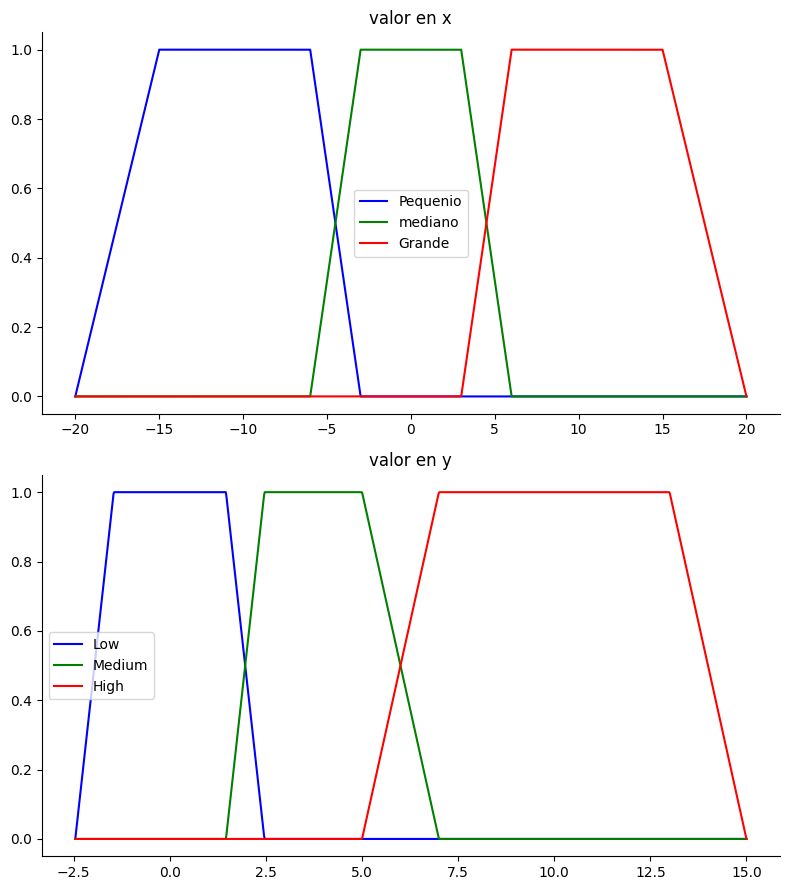

In [75]:
# Visualize these universes and membership functions
fig, (ax0, ax2) = plt.subplots(nrows=2, figsize=(8, 9))

ax0.plot(x, x_pequeno, 'b', linewidth=1.5, label='Pequenio')
ax0.plot(x, x_mediano, 'g', linewidth=1.5, label='mediano')
ax0.plot(x, x_grande, 'r', linewidth=1.5, label='Grande')
ax0.set_title('valor en x')
ax0.legend()

ax2.plot(y, y_pequeno, 'b', linewidth=1.5, label='Low')
ax2.plot(y, y_mediano, 'g', linewidth=1.5, label='Medium')
ax2.plot(y, y_grande, 'r', linewidth=1.5, label='High')
ax2.set_title('valor en y')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [54]:


for valor_entrada in entrada:
    # Calcular el grado de pertenencia de la entrada en las funciones de pertenencia
    grado_pequeno = fuzz.interp_membership(x, x_pequeno, valor_entrada)
    grado_mediano = fuzz.interp_membership(x, x_mediano, valor_entrada)
    grado_grande = fuzz.interp_membership(x, x_grande, valor_entrada)

    # Aplicar reglas difusas (estos dan resultado de arrays)
    activacion_pequeno = np.fmin(grado_pequeno, y_pequeno)
    activacion_mediano = np.fmin(grado_mediano, y_mediano)
    activacion_grande = np.fmin(grado_grande, y_grande)

    # Agregar las activaciones (estos tambien dan resultado de arrays)
    agregado = np.fmax(activacion_pequeno, np.fmax(activacion_mediano, activacion_grande))
    # Calcular el centroide (defuzzifica)
    centroide = fuzz.defuzz(y, agregado, 'centroid')
    salida_centroide.append(centroide)

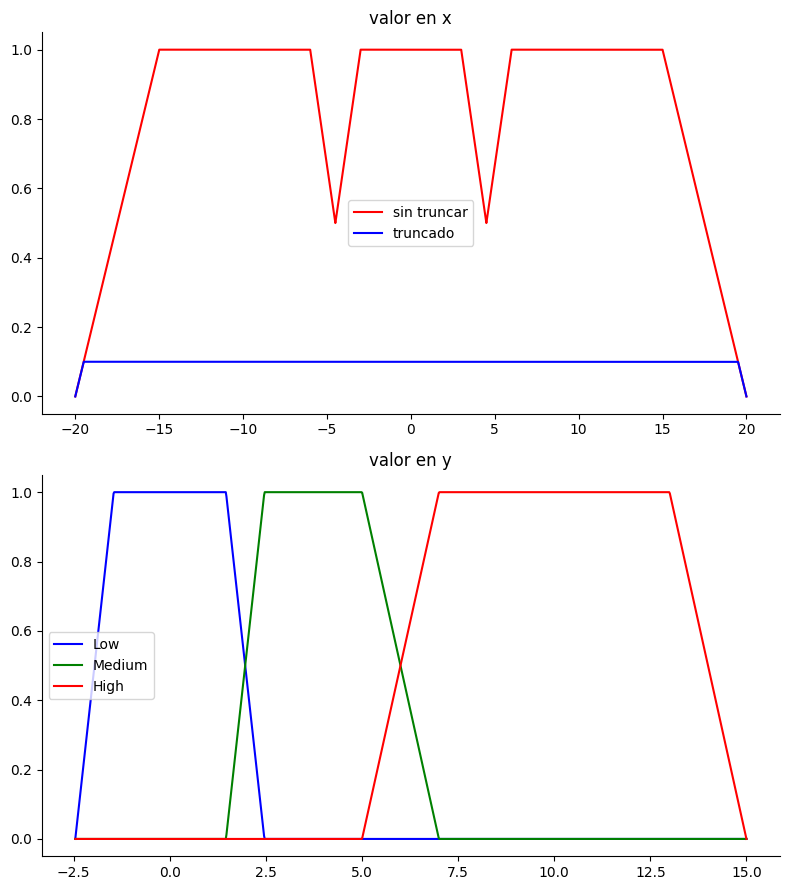

In [76]:


# Calcular el grado de pertenencia de la entrada en las funciones de pertenencia
valor_truncador = 0.1
mf = [x_grande,x_mediano,x_pequeno]
f_junta = mf[0]
for funcion in mf[1:]:
    f_junta = np.fmax(f_junta,funcion)


f_junta_truncada = np.fmin(valor_truncador, f_junta)
# Visualize these universes and membership functions
fig, (ax0, ax2) = plt.subplots(nrows=2, figsize=(8, 9))

ax0.plot(x, f_junta, 'r', linewidth=1.5, label='sin truncar')
ax0.plot(x, f_junta_truncada, 'b', linewidth=1.5, label='truncado')
ax0.set_title('valor en x')
ax0.legend()

ax2.plot(y, y_pequeno, 'b', linewidth=1.5, label='Low')
ax2.plot(y, y_mediano, 'g', linewidth=1.5, label='Medium')
ax2.plot(y, y_grande, 'r', linewidth=1.5, label='High')
ax2.set_title('valor en y')
ax2.legend()

# Turn off top/right axes
for ax in (ax0, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [ ]:

# Resultados
for i, valor_entrada in enumerate(entrada):
    print(f"Para la entrada x = {valor_entrada}, la salida y calculada por centroide es: {salida_centroide[i]}")
